Loading data...


C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[feat_name] = X[feat1] * X[feat2]
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:99: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[feat_name] = X_test[feat1] * X_test[feat2]
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:98: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid


==== Fold 1/5 ====
Training CatBoost...
0:	test: 0.7189962	best: 0.7189962 (0)	total: 671ms	remaining: 16m 45s
200:	test: 0.7358459	best: 0.7358459 (200)	total: 1m 42s	remaining: 11m 5s
400:	test: 0.7365983	best: 0.7366020 (392)	total: 2m 58s	remaining: 8m 9s
600:	test: 0.7368940	best: 0.7368940 (600)	total: 4m 12s	remaining: 6m 17s
800:	test: 0.7371592	best: 0.7371750 (763)	total: 5m 59s	remaining: 5m 13s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.737193509
bestIteration = 882

Shrink model to first 883 iterations.
Training LightGBM...
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[341]	valid_0's auc: 0.737037
CatBoost Fold 1 AUC: 0.737194
LightGBM Fold 1 AUC: 0.737037
Ensemble Fold 1 AUC: 0.737817 (weights: [0.50018356 0.49981644])
New best model found! Score: 0.737817
훈련 데이터 크기: 205080 -> 리샘플링 후: 158946
훈련 데이터 클래스 분포: [152098  52982]
리샘플링 후 클래스 분포: [105964  52982]

==== Fold 2/5 ====
Training CatBoost...
0

C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\tjddl\AppData\Local\Temp\ipykernel_17464\3687301400.py:323: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing f

Feature importance plot saved.

Submission saved: cat_lgb_ensemble.csv
Final Ensemble OOF AUC: 0.740011


C:\Users\tjddl\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjddl\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjddl\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjddl\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\tjddl\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 

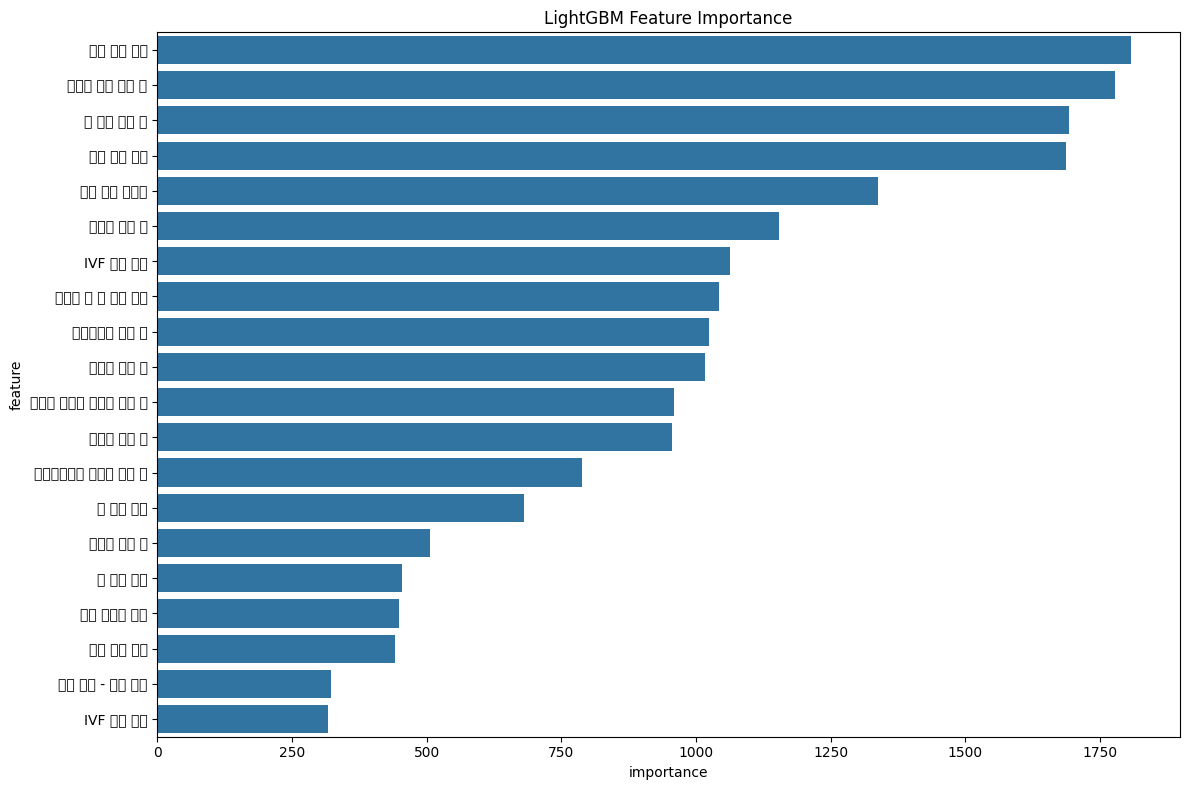

In [1]:
# pandas >= 1.3.0
# numpy >= 1.20.0
# matplotlib >= 3.4.0
# seaborn >= 0.11.0
# scikit-learn >= 1.0.0
# imbalanced-learn >= 0.8.0
# catboost >= 1.0.0
# lightgbm >= 3.3.0
# scipy >= 1.7.0

# 데이터 불균형 비율 약 3:1(190,123 : 66,228)
# 모델 파라미터 최적화
# 모델 앙상블 구현
# 최적 가중치 최적화
# 최적 모델 저장
# 최적 파라미터 출력
# LightGBM 모델
# CatBoost 모델 

import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, PowerTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
from lightgbm import LGBMClassifier
from scipy.optimize import minimize

# 데이터 불러오기 및 전처리
def preprocess_data(train_path, test_path):
    print("Loading data...")
    train = pd.read_csv(train_path)
    test = pd.read_csv(test_path)
    sample_submission = pd.read_csv(test_path.replace('test.csv', 'sample_submission.csv'))
    
    # ID 컬럼 제거
    if 'ID' in train.columns:
        train.drop(columns=['ID'], inplace=True)
    if 'ID' in test.columns:
        test.drop(columns=['ID'], inplace=True)

    y = train['임신 성공 여부']
    X = train.drop(columns=['임신 성공 여부'])
    X_test = test.copy()

    # 결측치 처리
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = X[col].fillna('Unknown')
            X_test[col] = X_test[col].fillna('Unknown')
        else:
            X[col] = X[col].fillna(X[col].mean())
            X_test[col] = X_test[col].fillna(X[col].mean())

    # 범주형/수치형 변수 구분
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

    # 범주형 변수 인코딩
    ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[categorical_features] = ordinal_encoder.fit_transform(X[categorical_features])
    X_test[categorical_features] = ordinal_encoder.transform(X_test[categorical_features])

    # 수치형 변수 스케일링
    scaler = MinMaxScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    X_test[numerical_features] = scaler.transform(X_test[numerical_features])

    # 이상치 처리
    for col in numerical_features:
        q1 = X[col].quantile(0.01)
        q3 = X[col].quantile(0.99)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        X[col] = np.clip(X[col], lower_bound, upper_bound)
        X_test[col] = np.clip(X_test[col], lower_bound, upper_bound)

    # 파워 변환으로 분포 개선
    power = PowerTransformer(method='yeo-johnson')
    X[numerical_features] = power.fit_transform(X[numerical_features])
    X_test[numerical_features] = power.transform(X_test[numerical_features])
    
    # 상호작용 특성을 저장할 리스트
    interact_features = []
    
    # 상호작용 특성 생성
    for i in range(min(10, len(numerical_features))):
        for j in range(i+1, min(11, len(numerical_features))):
            feat1, feat2 = numerical_features[i], numerical_features[j]
            feat_name = f'{feat1}_{feat2}_interact'
            interact_features.append(feat_name)
            X[feat_name] = X[feat1] * X[feat2]
            X_test[feat_name] = X_test[feat1] * X_test[feat2]
    
    # 중요: 범주형 변수는 float로 변환하지 않음
    # 수치형 변수와 상호작용 특성만 float로 변환
    X[numerical_features + interact_features] = X[numerical_features + interact_features].astype(float)
    X_test[numerical_features + interact_features] = X_test[numerical_features + interact_features].astype(float)
    
    # 범주형 변수는 정수형으로 유지
    X[categorical_features] = X[categorical_features].astype(int)
    X_test[categorical_features] = X_test[categorical_features].astype(int)
    
    return X, y, X_test, sample_submission, categorical_features

# CatBoost 최적 파라미터
# CatBoost 최적 파라미터
def get_cat_params():
    return {
        "iterations": 1500,      # 3000 -> 1500 (효율성 개선)
        "learning_rate": 0.02,
        "depth": 8,
        "l2_leaf_reg": 5,
        "border_count": 128,
        "subsample": 0.8,
        "random_strength": 0.5,
        "bagging_temperature": 1,
        "od_type": "Iter",
        "od_wait": 40,           # 50 -> 40 (변경됨)
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "verbose": 100,
        "random_seed": 42,
        "class_weights": [1, 2.5],  # [1, 3] -> [1, 2.5] (변경됨)
        "boosting_type": "Ordered"  # 추가됨
    }

# LightGBM 최적 파라미터
def get_lgb_params():
    return {
        "n_estimators": 1200,    # 1500 -> 1200 (변경됨)
        "learning_rate": 0.02,
        "num_leaves": 64,
        "max_depth": 12,
        "min_data_in_leaf": 20,
        "max_bin": 255,
        "subsample": 0.8,
        "subsample_freq": 1,
        "colsample_bytree": 0.8,
        "min_child_weight": 0.001,
        "reg_alpha": 5,
        "reg_lambda": 10,
        "objective": "binary",   # cross_entropy도 시도해 볼 수 있음
        "metric": "auc",
        "boosting_type": "gbdt", # dart도 시도해 볼 수 있음
        "verbose": -1,
        "random_state": 42,
        "scale_pos_weight": 2.5  # 3.0 -> 2.5 (변경됨)
    }

# 가중치 최적화 함수 (예외 처리 추가)
def optimize_weights(predictions, y_true):
    def objective(weights):
        weights = np.array(weights)
        weights = weights / np.sum(weights)  # 정규화
        weighted_pred = np.sum([w * p for w, p in zip(weights, predictions)], axis=0)
        return -roc_auc_score(y_true, weighted_pred)  # 최대화를 위해 음수 사용
    
    n_models = len(predictions)
    # 기본 가중치를 모델 성능 기반으로 초기화
    initial_aucs = [roc_auc_score(y_true, pred) for pred in predictions]
    initial_weights = np.array(initial_aucs) / sum(initial_aucs)
    
    bounds = [(0, 1) for _ in range(n_models)]
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    
    try:
        result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
        return result.x
    except Exception as e:
        print(f"최적화 실패, 기본 가중치 사용: {e}")
        return initial_weights

# 배치 예측 함수 (메모리 효율성)
def batch_predict(model, X, batch_size=10000):
    predictions = []
    for i in range(0, len(X), batch_size):
        batch_pred = model.predict_proba(X.iloc[i:i+batch_size])[:, 1]
        predictions.append(batch_pred)
    return np.concatenate(predictions)

# 모델 훈련 및 예측 함수
def train_and_predict():
    # 데이터 로드 및 전처리
    X, y, X_test, sample_submission, categorical_features = preprocess_data(
        'train.csv',
        'test.csv'
    )
    
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # 모델 파라미터
    cat_params = get_cat_params()
    lgb_params = get_lgb_params()
    
    # 예측 결과 저장
    oof_preds_cat = np.zeros(len(X))
    oof_preds_lgb = np.zeros(len(X))
    test_preds_cat = np.zeros(len(X_test))
    test_preds_lgb = np.zeros(len(X_test))
    
    # 각 폴드별 최고 성능 모델 저장
    best_models = {'cat': None, 'lgb': None}
    best_score = 0
    
    # K-Fold 훈련
    for fold_idx, (tr_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\n==== Fold {fold_idx}/{n_splits} ====")
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
        
        try:
            # RandomUnderSampler 사용 (SMOTETomek 대체)
            # 0.5 비율은 소수:다수 = 1:2로 조정
            rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)  
            X_tr_res, y_tr_res = rus.fit_resample(X_tr, y_tr)
            
            # CatBoost 학습 - categorical_features를 직접 문자열로 전달
            print("Training CatBoost...")
            cat_model = CatBoostClassifier(**cat_params)
            
            cat_train_pool = Pool(X_tr_res, y_tr_res, cat_features=categorical_features)
            cat_val_pool = Pool(X_val, y_val, cat_features=categorical_features)
            
            cat_model.fit(
                cat_train_pool, 
                eval_set=cat_val_pool,
                early_stopping_rounds=100,
                verbose=200
            )
            
            # LightGBM 학습
            print("Training LightGBM...")
            lgb_model = LGBMClassifier(**lgb_params)
            lgb_model.fit(
                X_tr_res, y_tr_res,
                eval_set=[(X_val, y_val)],
                eval_metric='auc',
                callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=True)]
            )
            
            # 검증 세트 예측
            cat_val_pred = cat_model.predict_proba(X_val)[:, 1]
            lgb_val_pred = lgb_model.predict_proba(X_val)[:, 1]
            
            # OOF 예측 저장
            oof_preds_cat[val_idx] = cat_val_pred
            oof_preds_lgb[val_idx] = lgb_val_pred
            
            # 테스트 세트 예측 (배치 처리)
            test_preds_cat += batch_predict(cat_model, X_test) / n_splits
            test_preds_lgb += batch_predict(lgb_model, X_test) / n_splits
            
            # 개별 모델 성능 확인
            cat_auc = roc_auc_score(y_val, cat_val_pred)
            lgb_auc = roc_auc_score(y_val, lgb_val_pred)
            print(f"CatBoost Fold {fold_idx} AUC: {cat_auc:.6f}")
            print(f"LightGBM Fold {fold_idx} AUC: {lgb_auc:.6f}")
            
            # 가중치 최적화로 앙상블
            weights = optimize_weights([cat_val_pred, lgb_val_pred], y_val)
            weighted_val_pred = weights[0] * cat_val_pred + weights[1] * lgb_val_pred
            ensemble_auc = roc_auc_score(y_val, weighted_val_pred)
            print(f"Ensemble Fold {fold_idx} AUC: {ensemble_auc:.6f} (weights: {weights})")
            
            # 최고 성능 모델 업데이트
            if ensemble_auc > best_score:
                best_score = ensemble_auc
                best_models['cat'] = cat_model
                best_models['lgb'] = lgb_model
                print(f"New best model found! Score: {best_score:.6f}")
                
                # 모델 저장
                best_models['cat'].save_model(f'best_cat_model.cbm')
                import joblib
                joblib.dump(best_models['lgb'], f'best_lgb_model.bin')
                
            # 모델 훈련 진행 확인을 위한 로깅 추가
            print(f"훈련 데이터 크기: {len(X_tr)} -> 리샘플링 후: {len(X_tr_res)}")
            print(f"훈련 데이터 클래스 분포: {np.bincount(y_tr)}")
            print(f"리샘플링 후 클래스 분포: {np.bincount(y_tr_res)}")
            
        except Exception as e:
            print(f"Error in fold {fold_idx}: {e}")
            continue
            
        # 메모리 정리
        gc.collect()
    
    # 전체 OOF 성능 평가
    cat_oof_auc = roc_auc_score(y, oof_preds_cat)
    lgb_oof_auc = roc_auc_score(y, oof_preds_lgb)
    print(f"\nCatBoost OOF AUC: {cat_oof_auc:.6f}")
    print(f"LightGBM OOF AUC: {lgb_oof_auc:.6f}")
    
    # 전체 데이터에 대한 최적 가중치 계산
    final_weights = optimize_weights([oof_preds_cat, oof_preds_lgb], y)
    oof_ensemble = final_weights[0] * oof_preds_cat + final_weights[1] * oof_preds_lgb
    ensemble_oof_auc = roc_auc_score(y, oof_ensemble)
    print(f"Final Ensemble OOF AUC: {ensemble_oof_auc:.6f}")
    print(f"Final weights: CatBoost={final_weights[0]:.4f}, LightGBM={final_weights[1]:.4f}")
    
    # 테스트 데이터 최종 예측
    final_prediction = final_weights[0] * test_preds_cat + final_weights[1] * test_preds_lgb
    
    # 특성 중요도 시각화
    if best_models['lgb'] is not None:
        feature_importance = pd.DataFrame({
            'feature': X.columns,
            'importance': best_models['lgb'].feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
        plt.title('LightGBM Feature Importance')
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        print("Feature importance plot saved.")
    
    # 제출 파일 생성
    sample_submission['probability'] = final_prediction
    submission_path = "cat_lgb_ensemble.csv"
    sample_submission.to_csv(submission_path, index=False)
    print(f"\nSubmission saved: {submission_path}")
    print(f"Final Ensemble OOF AUC: {ensemble_oof_auc:.6f}")

if __name__ == "__main__":
    train_and_predict()